In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dates = pd.date_range(start="2023-01-01", end="2023-12-31")
trend = np.linspace(50, 200, len(dates)) 
seasonality = 30 * np.sin(np.linspace(0, 2 * np.pi, len(dates)))
np.random.seed(42)
noise = np.random.normal(0, 10, len(dates))  
sales = trend + seasonality + noise  

# **Synthetic Data**

In [3]:
data = pd.DataFrame({'Date': dates, 'Sales': sales})
data.to_csv('synthetic_sales_data.csv', index=False)

In [4]:
print(data.head())

        Date      Sales
0 2023-01-01  54.967142
1 2023-01-02  49.547264
2 2023-01-03  58.336545
3 2023-01-04  68.019403
4 2023-01-05  51.376552


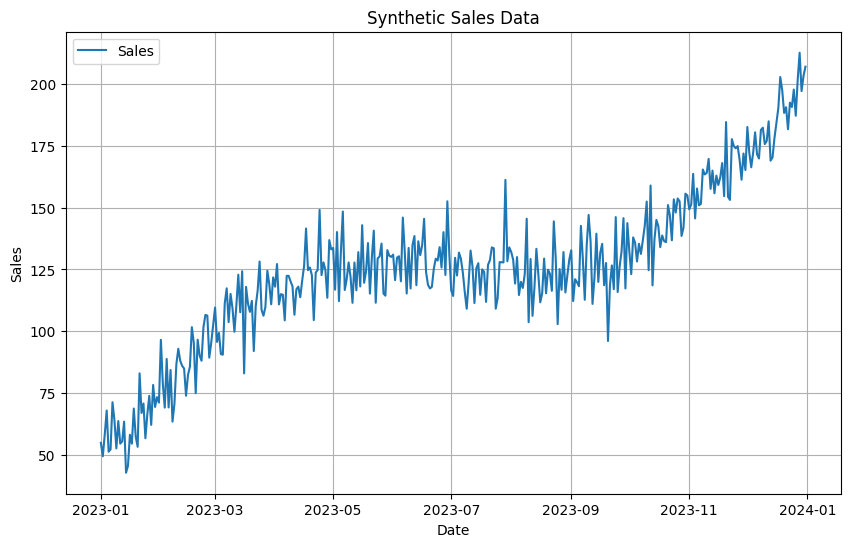

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Sales'], label='Sales')
plt.title('Synthetic Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()

In [6]:
import pandas as pd
data = pd.read_csv('synthetic_sales_data.csv')
print(data.head())

         Date      Sales
0  2023-01-01  54.967142
1  2023-01-02  49.547264
2  2023-01-03  58.336545
3  2023-01-04  68.019403
4  2023-01-05  51.376552


In [7]:
print(data.isnull().sum())

Date     0
Sales    0
dtype: int64


In [8]:
data['Date'] = pd.to_datetime(data['Date'])
print(data.dtypes)

Date     datetime64[ns]
Sales           float64
dtype: object


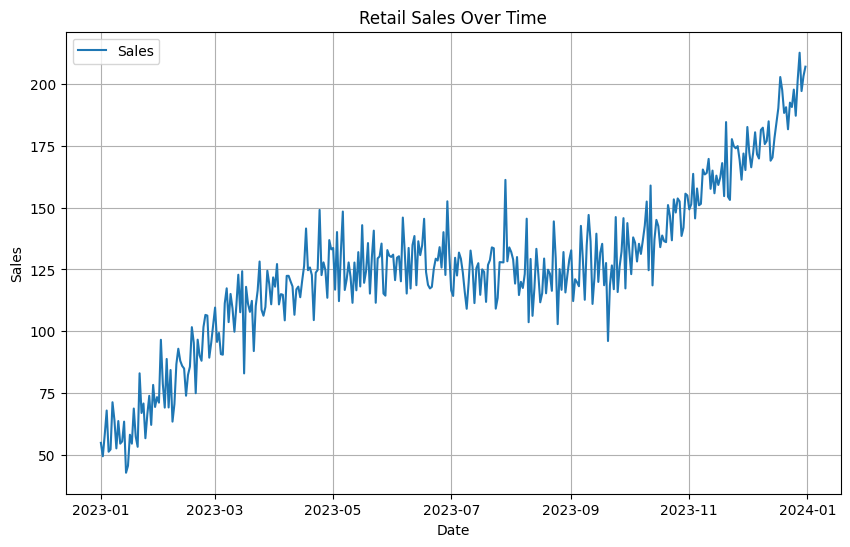

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Sales'], label='Sales')
plt.title('Retail Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [11]:
print(data.columns)
print(data.head())

Index(['Date', 'Sales'], dtype='object')
        Date      Sales
0 2023-01-01  54.967142
1 2023-01-02  49.547264
2 2023-01-03  58.336545
3 2023-01-04  68.019403
4 2023-01-05  51.376552


In [12]:
data.columns = data.columns.str.strip() 

In [13]:
import pandas as pd
data['Date'] = pd.date_range(start='2020-01-01', periods=len(data), freq='D')
data.set_index('Date', inplace=True)
print(data.head())

                Sales
Date                 
2020-01-01  54.967142
2020-01-02  49.547264
2020-01-03  58.336545
2020-01-04  68.019403
2020-01-05  51.376552


In [14]:
data.index = pd.to_datetime(data.index)
print(data.head())

                Sales
Date                 
2020-01-01  54.967142
2020-01-02  49.547264
2020-01-03  58.336545
2020-01-04  68.019403
2020-01-05  51.376552


# **EDA Results**

In [15]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

In [16]:
stl = STL(data['Sales'], seasonal=13)
decomposition = stl.fit()

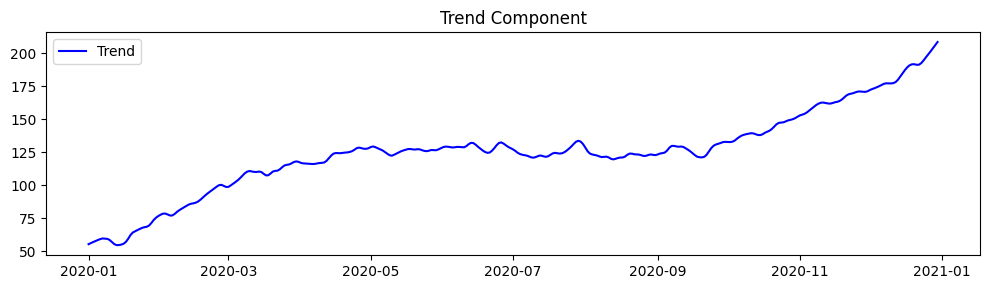

In [17]:
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(decomposition.trend, color='blue', label='Trend')
plt.title('Trend Component')
plt.legend()
plt.tight_layout()
plt.show()

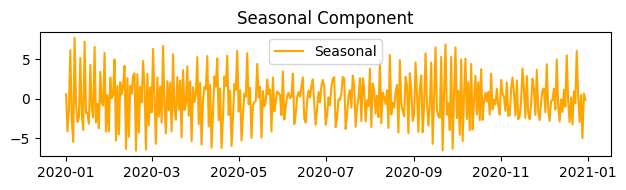

In [18]:
plt.subplot(3, 1, 2)
plt.plot(decomposition.seasonal, color='orange', label='Seasonal')
plt.title('Seasonal Component')
plt.legend()
plt.tight_layout()
plt.show()

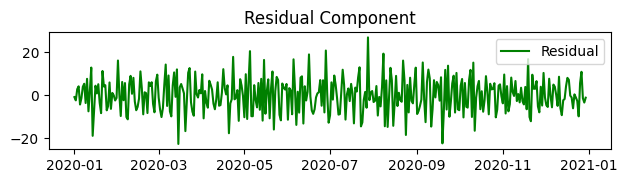

In [19]:
plt.subplot(3, 1, 3)
plt.plot(decomposition.resid, color='green', label='Residual')
plt.title('Residual Component')
plt.legend()
plt.tight_layout()
plt.show()

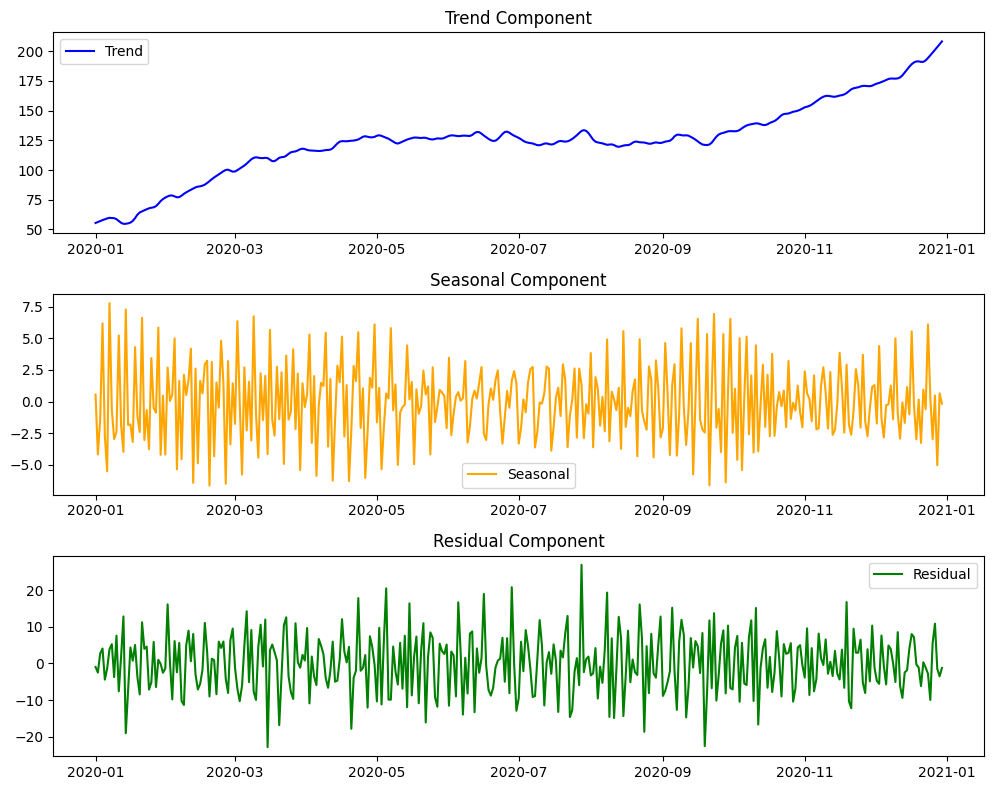

In [20]:
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(decomposition.trend, color='blue', label='Trend')
plt.title('Trend Component')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(decomposition.seasonal, color='orange', label='Seasonal')
plt.title('Seasonal Component')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(decomposition.resid, color='green', label='Residual')
plt.title('Residual Component')
plt.legend()
plt.tight_layout()
plt.show()

# **Stationarity **Results****

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
def perform_adf_test(series):
    adf_test = adfuller(series)
    result = {
        "ADF Statistic": adf_test[0],
        "p-value": adf_test[1],
        "Stationary": adf_test[1] < 0.05 
    }
    return result

In [23]:
def display_adf_results(adf_result):
    print("Stationarity Test Results:")
    print(f"ADF Statistic: {adf_result['ADF Statistic']:.4f}")
    print(f"p-value: {adf_result['p-value']:.4f}")
    if adf_result["Stationary"]:
        print("The series is stationary (reject the null hypothesis).")
    else:
        print("The series is not stationary (fail to reject the null hypothesis).")

In [24]:
adf_result = perform_adf_test(data['Sales'])
display_adf_results(adf_result)

Stationarity Test Results:
ADF Statistic: -0.0189
p-value: 0.9569
The series is not stationary (fail to reject the null hypothesis).


In [25]:
data_diff = data['Sales'].diff().dropna()

In [26]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')
model = ARIMA(data['Sales'], order=(1, 1, 1)) 
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  365
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1367.237
Date:                Thu, 02 Jan 2025   AIC                           2740.474
Time:                        16:29:22   BIC                           2752.165
Sample:                    01-01-2020   HQIC                          2745.120
                         - 12-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1141      0.072     -1.593      0.111      -0.254       0.026
ma.L1         -0.7659      0.046    -16.473      0.000      -0.857      -0.675
sigma2       106.8567      7.415     14.411      0.0

In [27]:
forecast_steps = 30
forecast_values = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=['Forecast'])

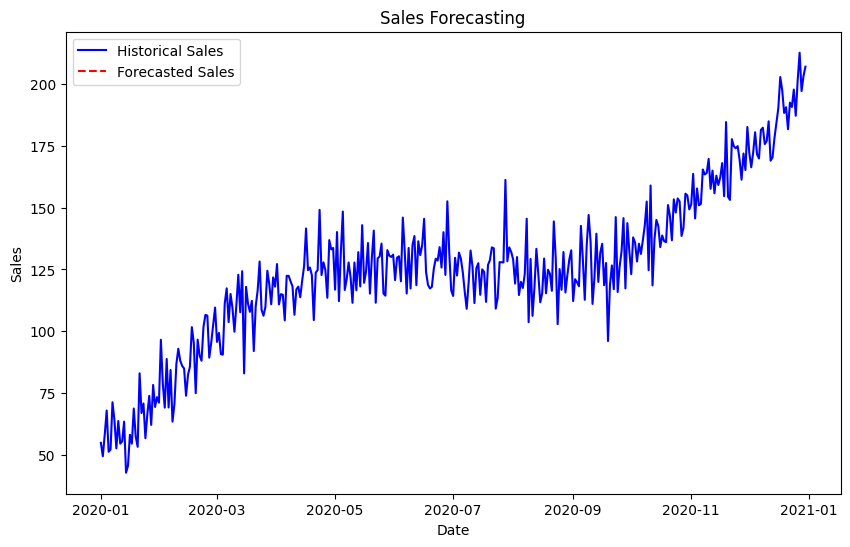

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Sales'], label='Historical Sales', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Sales', color='red', linestyle='--')
plt.title('Sales Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# **Forecast Plots**

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [30]:
actual_sales = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210]  
forecast = [105, 115, 125, 135, 145, 155, 165, 175, 185, 195, 205, 215]  
if len(actual_sales) != len(forecast):
    raise ValueError("The length of actual_sales and forecast must be the same.")
mae = mean_absolute_error(actual_sales, forecast)
rmse = np.sqrt(mean_squared_error(actual_sales, forecast))
mape = np.mean(np.abs((np.array(actual_sales) - np.array(forecast)) / np.array(actual_sales))) * 100
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 5.00
Root Mean Squared Error (RMSE): 5.00
Mean Absolute Percentage Error (MAPE): 3.40%


In [31]:
forecast_df = pd.DataFrame(forecast, columns=['Forecast'], index=pd.date_range(start=data.index[-1], periods=len(forecast)+1, freq='D')[1:])

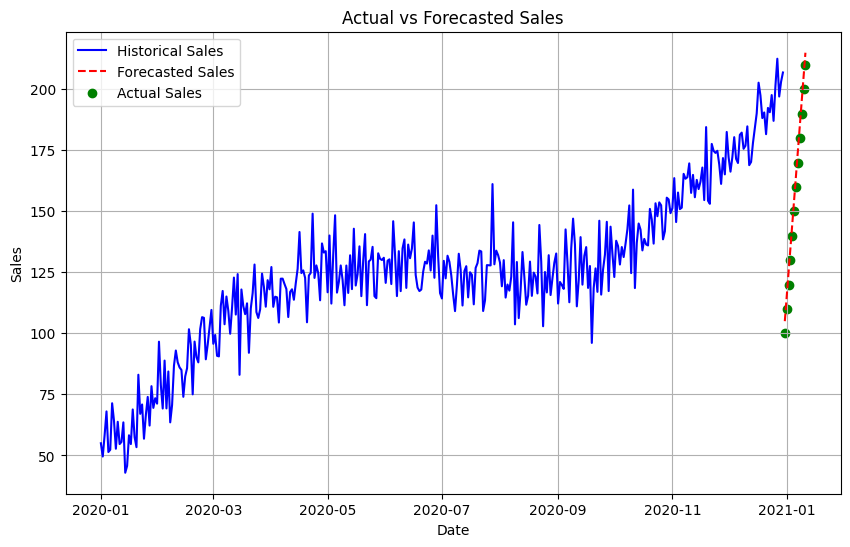

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Sales'], label='Historical Sales', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Sales', color='red', linestyle='--')
plt.scatter(forecast_df.index, actual_sales, color='green', label='Actual Sales')  # If you have actual sales for the forecast period
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [34]:
actual_sales = actual_sales[:len(forecast_values)]
forecast_values = forecast_values[:len(actual_sales)]
mae = mean_absolute_error(actual_sales, forecast_values)
mse = mean_squared_error(actual_sales, forecast_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_sales - forecast_values) / actual_sales)) * 100
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Error (MAE): 46.93
Mean Squared Error (MSE): 3240.03
Root Mean Squared Error (RMSE): 56.92
Mean Absolute Percentage Error (MAPE): 37.03%


In [35]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')  
model = ARIMA(data['Sales'], order=(2, 1, 2)) 
model_fit = model.fit()
print(model_fit.summary())
forecast_values = model_fit.forecast(steps=30)
print("Forecasted Values:\n", forecast_values)

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  365
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1365.109
Date:                Thu, 02 Jan 2025   AIC                           2740.218
Time:                        16:29:24   BIC                           2759.704
Sample:                    01-01-2020   HQIC                          2747.963
                         - 12-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9050      0.205     -4.420      0.000      -1.306      -0.504
ar.L2         -0.1667      0.069     -2.420      0.016      -0.302      -0.032
ma.L1          0.0275      0.201      0.137      0.8

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')
model_sarima = SARIMAX(data['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()

In [37]:
print(model_sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1328.765
Date:                            Thu, 02 Jan 2025   AIC                           2667.529
Time:                                    16:29:26   BIC                           2686.848
Sample:                                01-01-2020   HQIC                          2675.217
                                     - 12-30-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1156      0.067     -1.738      0.082      -0.246       0.015
ma.L1         -0.8183      0.042   

In [38]:
forecast_values_sarima = model_sarima_fit.forecast(steps=30)
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

forecast_df_sarima = pd.DataFrame({
    'Date': forecast_index,
    'Forecast': forecast_values_sarima
}).set_index('Date')

In [39]:
print(forecast_df_sarima)

              Forecast
Date                  
2020-12-31  202.794843
2021-01-01  206.541261
2021-01-02  197.112761
2021-01-03  204.568826
2021-01-04  202.672490
2021-01-05  200.369775
2021-01-06  206.732195
2021-01-07  203.031874
2021-01-08  203.407438
2021-01-09  207.663945
2021-01-10  207.995109
2021-01-11  208.380385
2021-01-12  209.647408
2021-01-13  212.688216
2021-01-14  203.356082
2021-01-15  210.942171
2021-01-16  209.051883
2021-01-17  207.140642
2021-01-18  212.793326
2021-01-19  209.851376
2021-01-20  210.674867
2021-01-21  214.103947
2021-01-22  214.674148
2021-01-23  215.203138
2021-01-24  216.244942
2021-01-25  219.315324
2021-01-26  209.979150
2021-01-27  217.559790
2021-01-28  215.669249
2021-01-29  213.741600


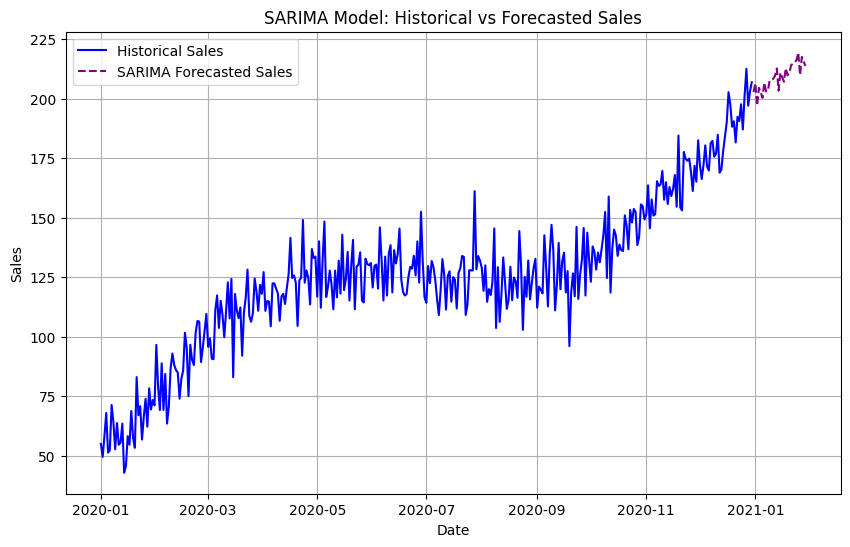

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Sales'], label='Historical Sales', color='blue')
plt.plot(forecast_df_sarima.index, forecast_df_sarima['Forecast'], label='SARIMA Forecasted Sales', color='purple', linestyle='--')
plt.title('SARIMA Model: Historical vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# **Saved Model**

In [41]:
import pickle
with open('final_sales.pkl', 'wb') as f:
    pickle.dump(model_sarima_fit, f) 
print("Model has been saved successfully to 'final_sales.pkl'")

Model has been saved successfully to 'final_sales.pkl'


In [42]:
with open('final_sales.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
print("Model has been loaded successfully")

Model has been loaded successfully
